---
# **Setup**
---

In [1]:
!pip install missingno numpy pandas

---
# **Importing important libraries**
---

In [2]:
import numpy as np              # For numerical computations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For enhanced data visualization
import missingno as msno        # for Visualize Missing Data
from sklearn.model_selection import train_test_split        # For splitting the data into training and testing sets
from sklearn.preprocessing import PolynomialFeatures        # For polynomial feature transformation
from sklearn.linear_model import LinearRegression           # For building the linear regression model
from sklearn.metrics import r2_score ,mean_squared_error                       # For evaluating the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

In [3]:
colors = sns.set_palette("RdBu", 5)
sns.set_theme(style="whitegrid", palette=colors, font="sans-serif")

---
# **Reading and Preparing the Data for Modeling**
---


## 1. Load Dataset to workspace
I will use the U.S._College_information_Real_dataset.csv .This dataset contains detailed information on 6,429 higher education institutions across the United States
https://www.kaggle.com/datasets/muhammadrahimusman12/u-s-college-information-data-set

In [4]:
data = pd.read_csv("U.S._College_information_Real_dataset.csv")
data.head(10)

,Unnamed: 0,zip,city,name,alias,state,locale,address,dolflag,branches,ownership,main_campus,state_fips,religious_affiliation,tuition_revenue_per_fte,instructional_expenditure_per_fte,peps_ownership,faculty_salary,online_only
0,0,35762,Normal,Alabama A & M University,AAMU,AL,12.0,4900 Meridian Street,0,1,1,1,1,NaN,10011.0,6298.0,Public,8610.0,0.0
1,1,35294-0110,Birmingham,University of Alabama at Birmingham,UAB,AL,12.0,Administration Bldg Suite 1070,0,1,1,1,1,NaN,12052.0,17179.0,Public,12211.0,0.0
2,2,36117-3553,Montgomery,Amridge University,Southern Christian University Regions University,AL,12.0,1200 Taylor Rd,0,1,2,1,1,74.0,14365.0,5671.0,Private Nonprofit,5109.0,1.0
3,3,35899,Huntsville,University of Alabama in Huntsville,UAH University of Alabama Huntsville,AL,12.0,301 Sparkman Dr,1,1,1,1,1,NaN,9871.0,9461.0,Public,10411.0,0.0
4,4,36104-0271,Montgomery,Alabama State University,NaN,AL,12.0,915 S Jackson Street,0,1,1,1,1,NaN,9865.0,11082.0,Public,8015.0,0.0
5,5,35487-0100,Tuscaloosa,The University of Alabama,NaN,AL,12.0,739 University Blvd,1,1,1,1,1,NaN,13885.0,9380.0,Public,11090.0,0.0
6,6,35010,Alexander City,Central Alabama Community College,NaN,AL,32.0,1675 Cherokee Rd,1,1,1,1,1,NaN,2531.0,7893.0,Public,6773.0,0.0
7,7,35611,Athens,Athens State University,NaN,AL,31.0,300 N Beaty St,0,1,1,1,1,NaN,7237.0,9639.0,Public,9452.0,0.0
8,8,36117-3596,Montgomery,Auburn University at Montgomery,AUM||Auburn University at Montgomery|Auburn Mo...,AL,12.0,7440 East Drive,0,1,1,1,1,NaN,8907.0,7006.0,Public,8823.0,0.0
9,9,36849,Auburn,Auburn University,NaN,AL,13.0,"Auburn, Alabama",1,1,1,1,1,NaN,16999.0,10041.0,Public,11907.0,0.0


## 2. Inspect Dataset

In [5]:
data.info

<bound method DataFrame.info of       Unnamed: 0         zip        city  \
0              0       35762      Normal   
1              1  35294-0110  Birmingham   
2              2  36117-3553  Montgomery   
3              3       35899  Huntsville   
4              4  36104-0271  Montgomery   
...          ...         ...         ...   
6424        6424   028400000     Newport   
6425        6425   443333631    Fairlawn   
6426        6426  85326-5705     Buckeye   
6427        6427  85027-0000     Phoenix   
6428        6428   080550000     Medford   

                                                   name  \
0                              Alabama A & M University   
1                   University of Alabama at Birmingham   
2                                    Amridge University   
3                   University of Alabama in Huntsville   
4                              Alabama State University   
...                                                 ...   
6424         College Unbou

In [6]:
# Show statistical summary
data.describe(include='all')

,Unnamed: 0,zip,city,name,alias,state,locale,address,dolflag,branches,ownership,main_campus,state_fips,religious_affiliation,tuition_revenue_per_fte,instructional_expenditure_per_fte,peps_ownership,faculty_salary,online_only
count,6429.000000,6429,6429,6429,2335,6429,5924.000000,5921,6429.000000,6429.000000,6429.000000,6429.000000,6429.000000,880.000000,5892.000000,5892.000000,6405,3856.000000,5924.000000
unique,NaN,5819,2362,6321,2203,59,NaN,5868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,20005,New York,Cortiva Institute,Penn State,CA,NaN,One College Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Proprietary,NaN,NaN
freq,NaN,6,75,6,19,672,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2411,NaN,NaN
mean,3214.000000,NaN,NaN,NaN,NaN,NaN,19.943450,NaN,0.367709,3.183699,2.056618,0.788303,29.010733,56.022727,11505.175153,9827.592668,NaN,7761.926608,0.010804
std,1856.036772,NaN,NaN,NaN,NaN,NaN,9.841441,NaN,0.482219,6.591915,0.832540,0.408543,16.888467,22.211250,9287.714634,15728.592206,NaN,2853.086897,0.103386
min,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,22.000000,0.000000,0.000000,NaN,488.000000,0.000000
25%,1607.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,0.000000,1.000000,1.000000,1.000000,13.000000,30.000000,5282.500000,4348.000000,NaN,5946.750000,0.000000
50%,3214.000000,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,0.000000,1.000000,2.000000,1.000000,29.000000,54.000000,10173.000000,7102.500000,NaN,7409.000000,0.000000
75%,4821.000000,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,1.000000,2.000000,3.000000,1.000000,42.000000,71.000000,14917.000000,11060.750000,NaN,9149.000000,0.000000


---
# Clean DATASET
---

## 1. rename columns

In [7]:
data.columns

Index(['Unnamed: 0', 'zip', 'city', 'name', 'alias', 'state', 'locale',
       'address', 'dolflag', 'branches', 'ownership', 'main_campus',
       'state_fips', 'religious_affiliation', 'tuition_revenue_per_fte',
       'instructional_expenditure_per_fte', 'peps_ownership', 'faculty_salary',
       'online_only'],
      dtype='object')

In [8]:
# Rename columns 
data.rename(columns={
    'Unnamed: 0': 'Student_Id',
    'zip': 'zip_code',
    'city': 'city',
    'name': 'institution_name',
    'alias': 'alias',
    'state': 'state',
    'locale': 'locale',
    'address': 'address',
    'dolflag': 'dol_flag',
    'branches': 'branches',
    'ownership': 'ownership_code',
    'main_campus': 'main_campus',
    'state_fips': 'state_fips',
    'religious_affiliation': 'religious_affiliation',
    'tuition_revenue_per_fte': 'tuition_revenue_per_fte',
    'instructional_expenditure_per_fte': 'instructional_expenditure_per_fte',
    'peps_ownership': 'ownership_type',
    'faculty_salary': 'faculty_salary',
    'online_only': 'online_only'
}, inplace=True)

# Check result
print(data.columns)


Index(['Student_Id', 'zip_code', 'city', 'institution_name', 'alias', 'state',
       'locale', 'address', 'dol_flag', 'branches', 'ownership_code',
       'main_campus', 'state_fips', 'religious_affiliation',
       'tuition_revenue_per_fte', 'instructional_expenditure_per_fte',
       'ownership_type', 'faculty_salary', 'online_only'],
      dtype='object')


## 2. check data types

In [9]:
data.dtypes

Student_Id                             int64
zip_code                              object
city                                  object
institution_name                      object
alias                                 object
state                                 object
locale                               float64
address                               object
dol_flag                               int64
branches                               int64
ownership_code                         int64
main_campus                            int64
state_fips                             int64
religious_affiliation                float64
tuition_revenue_per_fte              float64
instructional_expenditure_per_fte    float64
ownership_type                        object
faculty_salary                       float64
online_only                          float64
dtype: object

In [10]:
data['Student_Id'] = data['Student_Id'].astype('O')
data['dol_flag'] = data['dol_flag'].map({0: "No", 1: "Yes"})
data['ownership_code'] = data['ownership_code'].map({1: "Public", 2: "Private Nonprofit", 3: "Private For-Profit"})
data['main_campus'] = data['main_campus'].map({0: "No", 1: "Yes"})
data['online_only'] = data['online_only'].map({0: "No", 1: "Yes"})

# Check the result
print(data.dtypes)

Student_Id                            object
zip_code                              object
city                                  object
institution_name                      object
alias                                 object
state                                 object
locale                               float64
address                               object
dol_flag                              object
branches                               int64
ownership_code                        object
main_campus                           object
state_fips                             int64
religious_affiliation                float64
tuition_revenue_per_fte              float64
instructional_expenditure_per_fte    float64
ownership_type                        object
faculty_salary                       float64
online_only                           object
dtype: object


## 3. Data Consistancy


In [11]:
numerical_columns = list(data.select_dtypes(include='number').columns)
categorical_columns =  list(data.select_dtypes(include='object').columns)

print(numerical_columns)
print(categorical_columns)

['locale', 'branches', 'state_fips', 'religious_affiliation', 'tuition_revenue_per_fte', 'instructional_expenditure_per_fte', 'faculty_salary']
['Student_Id', 'zip_code', 'city', 'institution_name', 'alias', 'state', 'address', 'dol_flag', 'ownership_code', 'main_campus', 'ownership_type', 'online_only']


In [12]:
# List of columns to inspect
cols = ['city', 'institution_name', 'alias', 'state', 'address', 'ownership_type']
# Loop through each column in the list
for col in cols:
    print(f"Column: {col}")  
    print(data[col].value_counts())
    print("=" * 50)

Column: city
city
New York        75
Chicago         68
Houston         64
Brooklyn        53
Los Angeles     48
                ..
Kings Point      1
Stone Ridge      1
Dryden           1
Throggs Neck     1
Buckeye          1
Name: count, Length: 2362, dtype: int64
Column: institution_name
institution_name
Cortiva Institute                                                6
Columbia College                                                 4
Academy of Beauty Professionals                                  4
Unitek College                                                   4
Cambridge College of Healthcare & Technology                     3
                                                                ..
The Rockefeller University                                       1
University of Rochester                                          1
Rochester Institute of Technology                                1
Roberts Wesleyan University                                      1
Burlington County Ins

## 4.Data describtion

In [13]:
data.select_dtypes('object').describe()

,Student_Id,zip_code,city,institution_name,alias,state,address,dol_flag,ownership_code,main_campus,ownership_type,online_only
count,6429,6429,6429,6429,2335,6429,5921,6429,6429,6429,6405,5924
unique,6429,5819,2362,6321,2203,59,5868,2,3,2,3,2
top,0,20005,New York,Cortiva Institute,Penn State,CA,One College Drive,No,Private For-Profit,Yes,Proprietary,No
freq,1,6,75,6,19,672,6,4065,2420,5068,2411,5860


In [14]:
data.select_dtypes('number').describe()

,locale,branches,state_fips,religious_affiliation,tuition_revenue_per_fte,instructional_expenditure_per_fte,faculty_salary
count,5924.000000,6429.000000,6429.000000,880.000000,5892.000000,5892.000000,3856.000000
mean,19.943450,3.183699,29.010733,56.022727,11505.175153,9827.592668,7761.926608
std,9.841441,6.591915,16.888467,22.211250,9287.714634,15728.592206,2853.086897
min,-3.000000,1.000000,1.000000,22.000000,0.000000,0.000000,488.000000
25%,12.000000,1.000000,13.000000,30.000000,5282.500000,4348.000000,5946.750000
50%,21.000000,1.000000,29.000000,54.000000,10173.000000,7102.500000,7409.000000
75%,22.000000,2.000000,42.000000,71.000000,14917.000000,11060.750000,9149.000000
max,43.000000,52.000000,78.000000,110.000000,228307.000000,723521.000000,25483.000000


## 5. check dublicates in the dataset

In [15]:
data.duplicated().sum()

0

## 6. Missing Data Analysis

In [16]:
missing_data = data.isna().sum().reset_index(name='Missing#')
missing_data

,index,Missing#
0,Student_Id,0
1,zip_code,0
2,city,0
3,institution_name,0
4,alias,4094
5,state,0
6,locale,505
7,address,508
8,dol_flag,0
9,branches,0


In [17]:
#Calculate the percentage of missing values for each column
missing_data = missing_data[ missing_data['Missing#'] > 0 ]
missing_data['Missing%'] = missing_data['Missing#'] *100 / len(data)
missing_data.rename({'index':'Feature'}, axis=1, inplace=True)
missing_data

C:\Users\OP\AppData\Local\Temp\ipykernel_1832\4030704774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Missing%'] = missing_data['Missing#'] *100 / len(data)
C:\Users\OP\AppData\Local\Temp\ipykernel_1832\4030704774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data.rename({'index':'Feature'}, axis=1, inplace=True)


,Feature,Missing#,Missing%
4,alias,4094,63.680199
6,locale,505,7.855032
7,address,508,7.901695
13,religious_affiliation,5549,86.312024
14,tuition_revenue_per_fte,537,8.352776
15,instructional_expenditure_per_fte,537,8.352776
16,ownership_type,24,0.373308
17,faculty_salary,2573,40.021776
18,online_only,505,7.855032


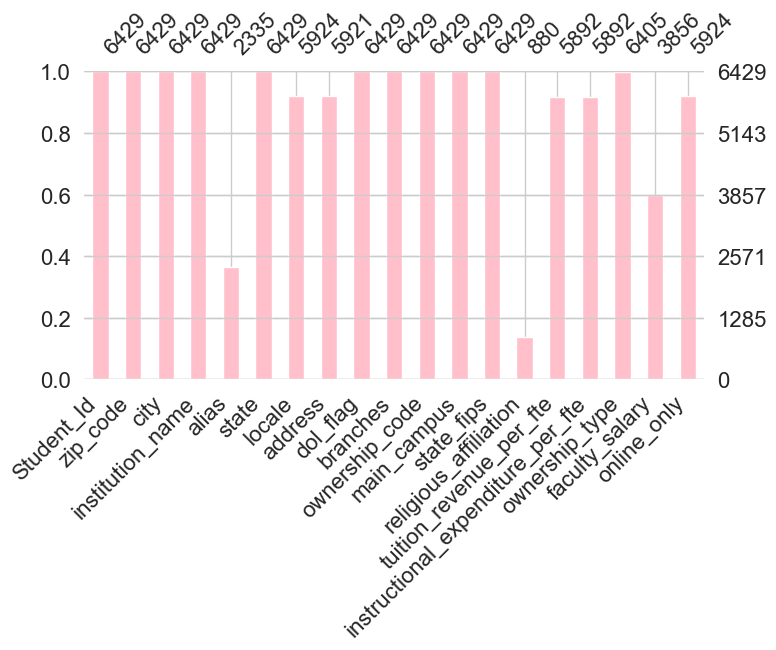

In [18]:
msno.bar(data, figsize=(8, 4), color='pink')
plt.show()

## Handling Missing Values: `religious_affiliation`

- **Column meaning**: Indicates whether an institution has a religious affiliation and, if so, specifies the type.
- **Type of missingness**: **Missing Not at Random (MNAR)** — the absence of a value likely means the institution has *no religious affiliation*.  
- **Handling strategy**: Replace missing values with `"No affiliation"` to make this explicit.


In [19]:
data['religious_affiliation'] = data['religious_affiliation'].fillna("No affiliation")
print (data.isna().sum())

Student_Id                              0
zip_code                                0
city                                    0
institution_name                        0
alias                                4094
state                                   0
locale                                505
address                               508
dol_flag                                0
branches                                0
ownership_code                          0
main_campus                             0
state_fips                              0
religious_affiliation                   0
tuition_revenue_per_fte               537
instructional_expenditure_per_fte     537
ownership_type                         24
faculty_salary                       2573
online_only                           505
dtype: int64


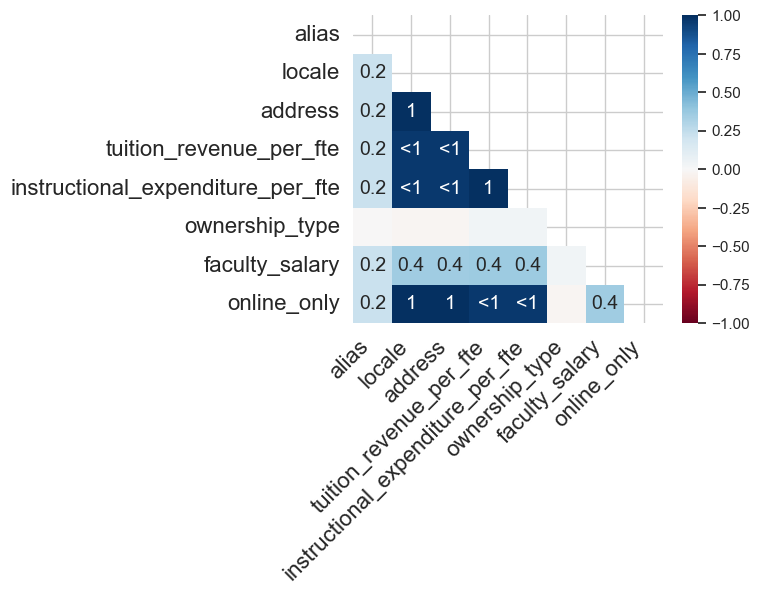

In [20]:
# Visualize correlation between missing values across columns
msno.heatmap(data, figsize=(5,4), cmap='RdBu')
plt.show()

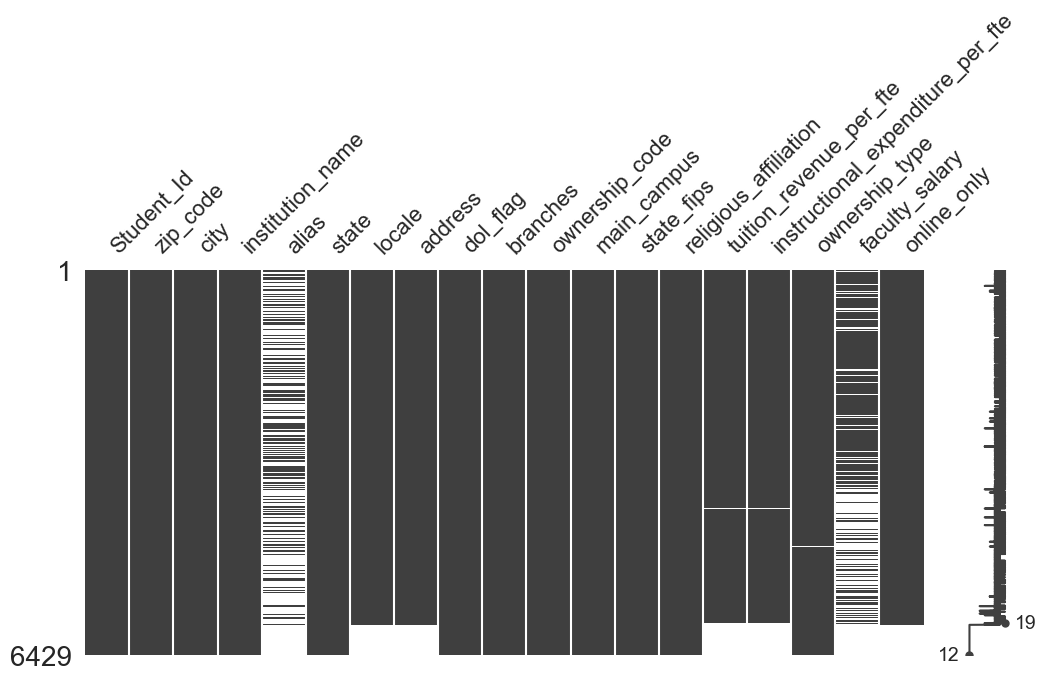

In [21]:
# Visualize missing values in the dataset using a matrix plot
msno.matrix(data, figsize=(12, 5))
plt.show()

### Alias Column - Missing Data

The **`alias`** column contains alternative or informal names by which a college or institution may be known.  

In dataset, the **`alias`** column contains 63.680199 % percentage of missing values.  
Since this information is not critical for our analysis and the missing proportion is large, we will **remove this column** from the dataset.  

**Type of Missing Data:**  
This is likely **Missing Completely at Random (MCAR)** — the absence of an alias does not depend on other variables in the dataset.


In [22]:
data=data.drop(columns=['alias'])
data = data.drop(columns=['state_fips']) #Same like alias coulmn
print(data.columns)  

Index(['Student_Id', 'zip_code', 'city', 'institution_name', 'state', 'locale',
       'address', 'dol_flag', 'branches', 'ownership_code', 'main_campus',
       'religious_affiliation', 'tuition_revenue_per_fte',
       'instructional_expenditure_per_fte', 'ownership_type', 'faculty_salary',
       'online_only'],
      dtype='object')


### Handling Missing Data: `address` vs `locale`

- The correlation heatmap shows that **`address`** and **`locale`** are highly correlated (≈1).  
- Since they provide overlapping information, keeping both causes redundancy.  
- Decision:
  - Drop **`locale`** (less informative, just numeric code).
  - Keep **`address`** (more descriptive and useful for filling missing values with `city`, `state`, `zip`).


In [23]:

data = data.drop(columns=['locale'])
print(data.columns)
# Fill missing address values using city, state, and zip_code
data['address'] = data['address'].fillna(
    data['city'] + ', ' + data['state'] + ' ' + data['zip_code'].astype(str)
)



Index(['Student_Id', 'zip_code', 'city', 'institution_name', 'state',
       'address', 'dol_flag', 'branches', 'ownership_code', 'main_campus',
       'religious_affiliation', 'tuition_revenue_per_fte',
       'instructional_expenditure_per_fte', 'ownership_type', 'faculty_salary',
       'online_only'],
      dtype='object')


### Rule-Based Imputation for `online_only`  

- **Idea** → Use `tuition_revenue_per_fte` as a predictor.  
- **Threshold** → 6,000 USD.  
- **Logic**:  
  - If `tuition_revenue_per_fte < 6000` → classify as **Yes (1)**.  
  - Else → classify as **No (0)**.  
- **Apply rule only on missing values** in `online_only`.  


In [24]:
data['online_only'] = data['online_only'].replace('', np.nan)
threshold = 6000  

data.loc[data['online_only'].isna(), 'online_only'] = data.loc[data['online_only'].isna(), 'tuition_revenue_per_fte'].apply(
    lambda x: "Yes" if x < threshold else "No"
)

print(data['online_only'].value_counts())

online_only
No     6365
Yes      64
Name: count, dtype: int64


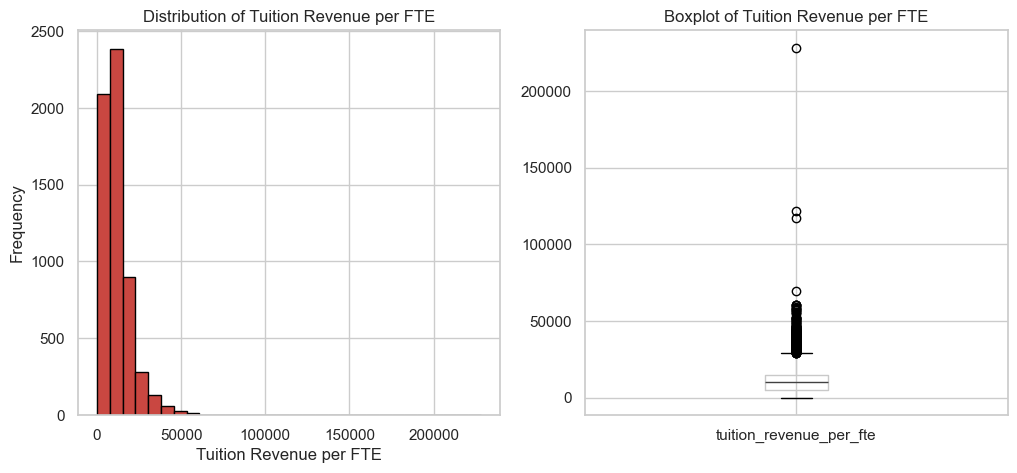

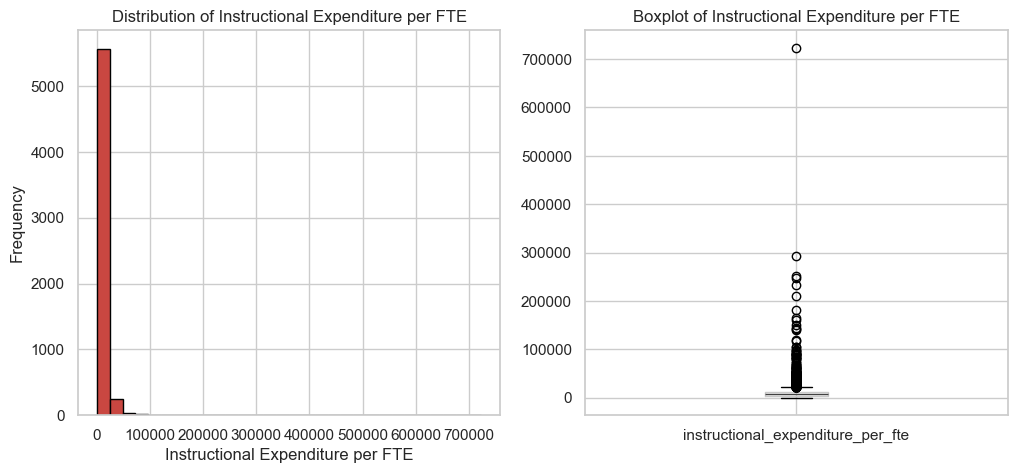

In [25]:

# Histogram + Boxplot for tuition_revenue_per_fte
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['tuition_revenue_per_fte'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Tuition Revenue per FTE')
plt.xlabel('Tuition Revenue per FTE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data.boxplot(column='tuition_revenue_per_fte')
plt.title('Boxplot of Tuition Revenue per FTE')

plt.show()

# Histogram + Boxplot for instructional_expenditure_per_fte
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['instructional_expenditure_per_fte'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Instructional Expenditure per FTE')
plt.xlabel('Instructional Expenditure per FTE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data.boxplot(column='instructional_expenditure_per_fte')
plt.title('Boxplot of Instructional Expenditure per FTE')

plt.show()


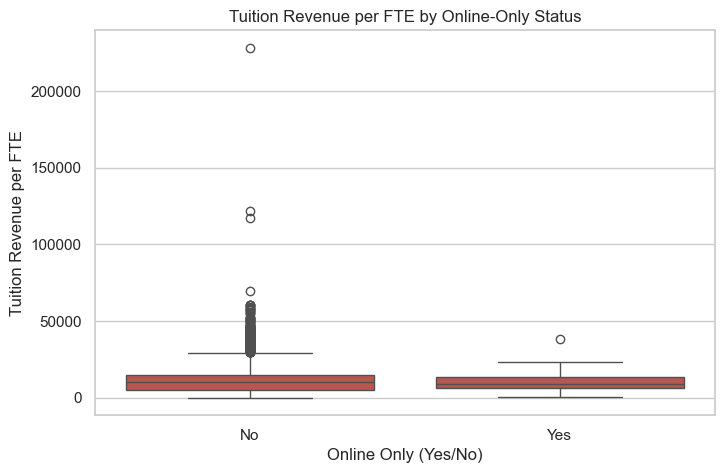

online_only
No     10193.0
Yes     8755.0
Name: tuition_revenue_per_fte, dtype: float64


In [26]:
# Boxplot to check tuition revenue distribution for online vs not-online
plt.figure(figsize=(8,5))
sns.boxplot(x='online_only', y='tuition_revenue_per_fte', data=data)
plt.title("Tuition Revenue per FTE by Online-Only Status")
plt.ylabel("Tuition Revenue per FTE")
plt.xlabel("Online Only (Yes/No)")
plt.show()

# Compare median values
print(data.groupby('online_only')['tuition_revenue_per_fte'].median())

### Handling Missing Values for `tuition_revenue_per_fte` & `instructional_expenditure_per_fte`

- **Tuition Revenue per FTE**: Mostly $0–50K, right-skewed → **median imputation** preferred.  
- **Instructional Expenditure per FTE**: Mostly < $100K, strongly right-skewed → **median imputation** preferred.  
- **Strategy**: Apply **state + online_only group median imputation** → preserves state-level variation while reducing outlier influence.  


In [27]:
# Imputation for tuition_revenue_per_fte
data['tuition_revenue_per_fte'] = (
    data.groupby(['online_only', 'state'])['tuition_revenue_per_fte']
      .transform(lambda x: x.fillna(x.median()))
)

# Imputation for instructional_expenditure_per_fte
data['instructional_expenditure_per_fte'] = (
    data.groupby(['online_only', 'state'])['instructional_expenditure_per_fte']
      .transform(lambda x: x.fillna(x.median()))
)
data.isna().sum()


Student_Id                              0
zip_code                                0
city                                    0
institution_name                        0
state                                   0
address                                 0
dol_flag                                0
branches                                0
ownership_code                          0
main_campus                             0
religious_affiliation                   0
tuition_revenue_per_fte                 0
instructional_expenditure_per_fte       0
ownership_type                         24
faculty_salary                       2573
online_only                             0
dtype: int64

### Handling Missing Values for `ownership_type`

- **Missing Percentage** → ~0.37% (very small, <1%)  
- **Decision**: Since the missing rate is extremely low,  
  → **Dropping rows is the best option**  


In [28]:
# Drop rows with missing ownership_type
data = data.dropna(subset=['ownership_type'])
print(data['ownership_type'].isna().sum())


0


### Preparing `faculty_salary` for Model Training & Prediction

- Rows with **non-null `faculty_salary`** → kept in the **training dataset**.  
- Rows with **null `faculty_salary`** → saved separately in a **hold-out dataset**.  
- After training a regression model on the training dataset, we will:
  1. Predict the missing values for the hold-out dataset.  
  2. Reintegrate the predicted salaries back into the main dataset.  


In [29]:
# Split data into training and hold-out sets
train_data = data[data['faculty_salary'].notna()].copy()
holdout_data = data[data['faculty_salary'].isna()].copy()

print(f"Training dataset shape: {train_data.shape}")
print(f"Hold-out dataset shape (to predict later): {holdout_data.shape}")


Training dataset shape: (3848, 16)
Hold-out dataset shape (to predict later): (2557, 16)


In [30]:
train_data.isna().sum()

Student_Id                           0
zip_code                             0
city                                 0
institution_name                     0
state                                0
address                              0
dol_flag                             0
branches                             0
ownership_code                       0
main_campus                          0
religious_affiliation                0
tuition_revenue_per_fte              0
instructional_expenditure_per_fte    0
ownership_type                       0
faculty_salary                       0
online_only                          0
dtype: int64

---
# Exploratory Data Analysis (EDA)
---

### Nummerical Features
- every Num cols ---> distribution --> Histogram (with kde), boxplot

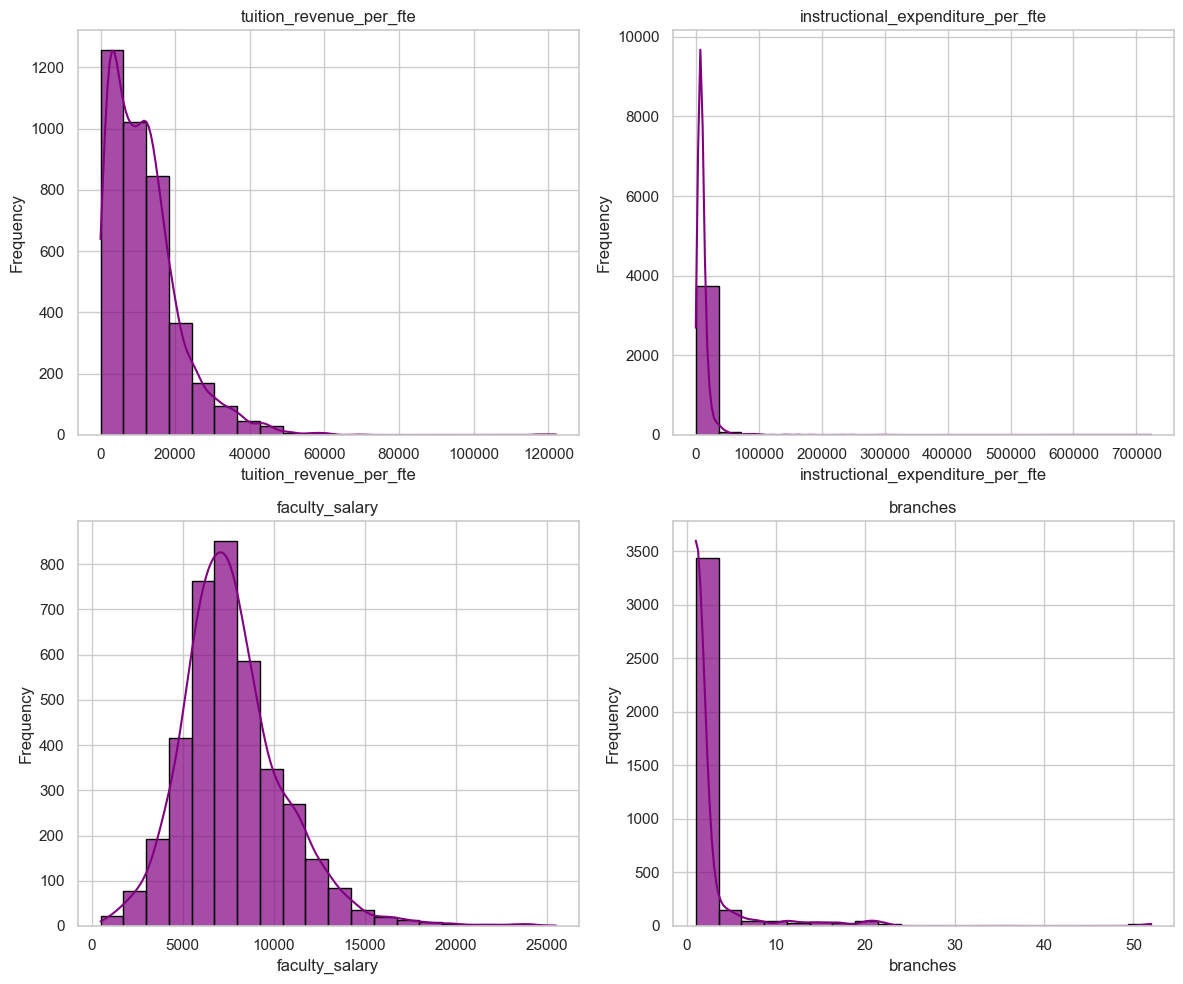

In [31]:
num_cols = ['tuition_revenue_per_fte', 'instructional_expenditure_per_fte', 'faculty_salary', 'branches']
rows = (len(num_cols) + 1) // 2
plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, 2, i+1)
    sns.histplot(train_data[col], bins=20, kde=True, color='purple', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

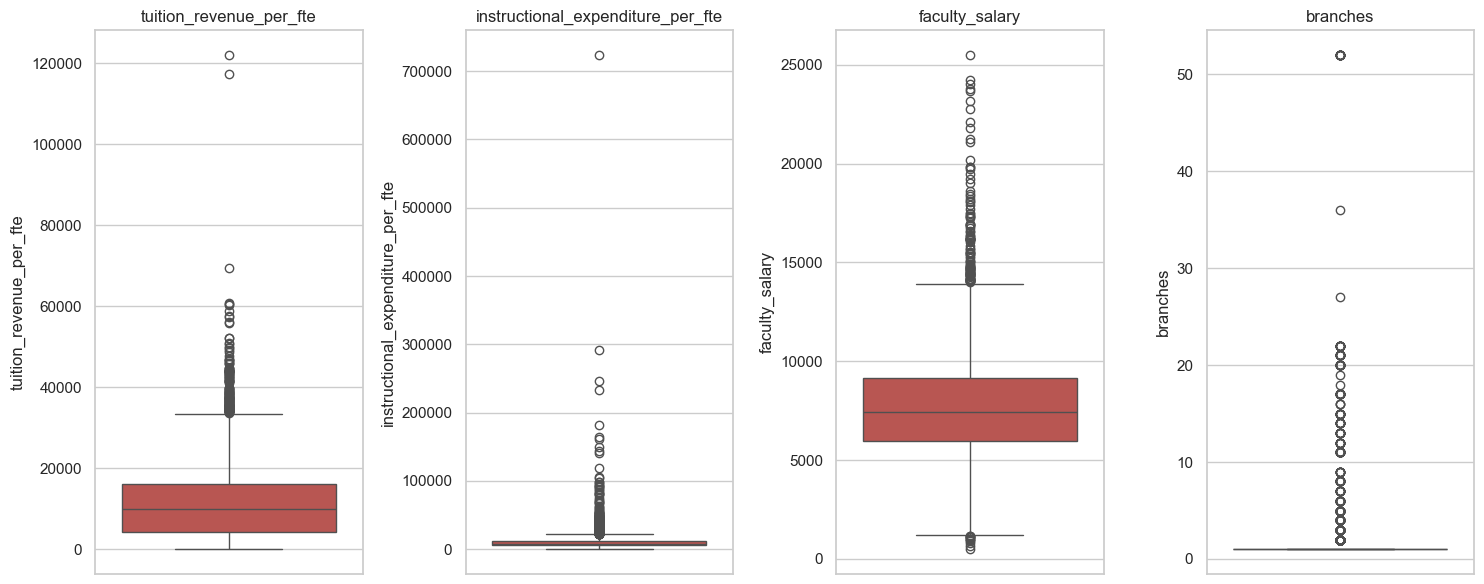

Percentage of Outliers in tuition_revenue_per_fte:
3.5083160083160085 

Percentage of Outliers in instructional_expenditure_per_fte:
7.224532224532225 

Percentage of Outliers in faculty_salary:
3.0145530145530146 

Percentage of Outliers in branches:
17.87941787941788 



In [32]:

# Boxplots
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=train_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Detect outliers using IQR method
outliers_dict = {}
for col in num_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_data[(train_data[col] < Q1 - 1.5*IQR) | (train_data[col] > Q3 + 1.5*IQR)][col]
    outliers_dict[col] = outliers

# Print outliers for each column
for col, outliers in outliers_dict.items():
    print(f"Percentage of Outliers in {col}:")
    print(outliers.count()/train_data.shape[0]*100, "\n")

### Handling of Outliers

After analyzing the numeric columns (`tuition_revenue_per_fte`, `instructional_expenditure_per_fte`, `faculty_salary`, `branches`), we identified a small percentage of outliers:

- Tuition per FTE: 3.51%
- Instructional expenditure per FTE: 7.22%
- Faculty salary: 3.01%
- Branches: 17.88%

**Decision:** We will **keep these outliers** in the dataset because they reflect **realistic variations** among institutions. For example, some universities naturally have higher tuition, larger expenditures, or more branches. Removing them would **distort the true distribution** of the data and reduce the validity of our analysis.


### Categorical Features
- every categorical column --> distribution ---> countplot, pieplot

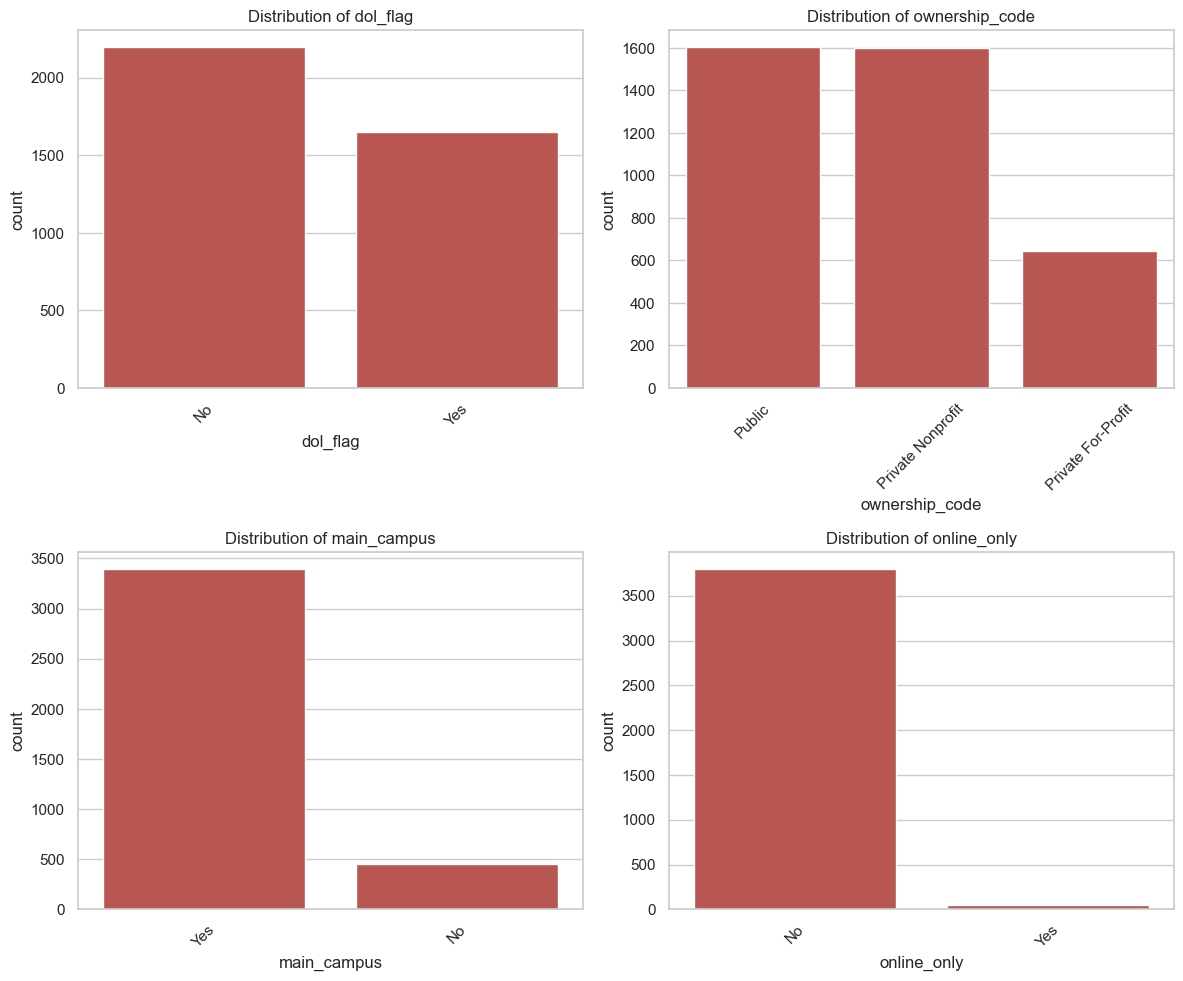

In [33]:
cat_cols = ['dol_flag', 'ownership_code', 'main_campus', 'branches', 'online_only','city','state','address','religious_affiliation']
cat_col = ['dol_flag', 'ownership_code', 'main_campus', 'online_only']
cols_per_row = 2
rows = (len(cat_cols) + 1) // cols_per_row
plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(cat_col):
    plt.subplot(rows, cols_per_row, i+1)
    sns.countplot(x=train_data[col], palette=colors)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

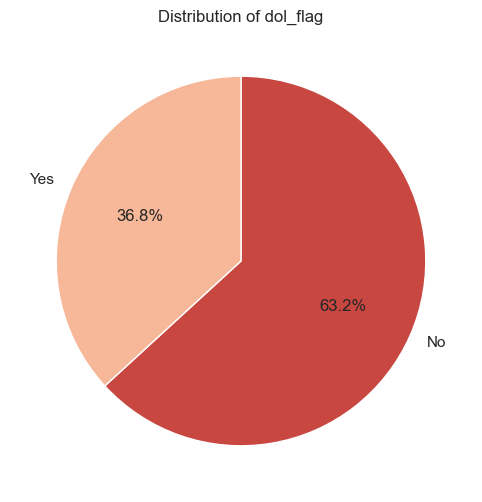

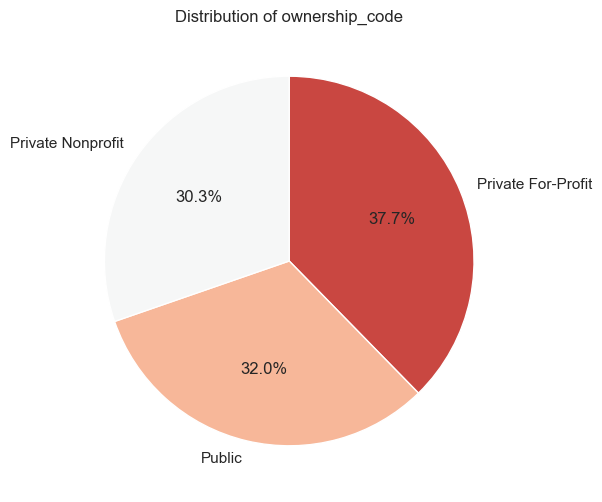

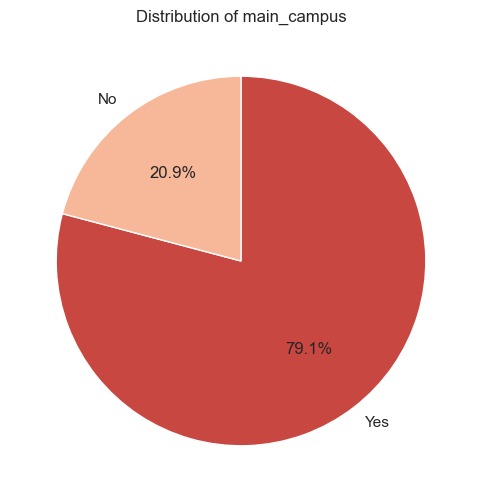

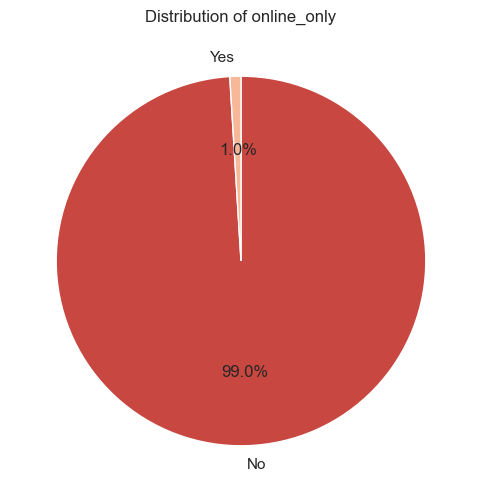

In [34]:
for col in cat_col:
    plt.figure(figsize=(10,6))
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%',   
        startangle=90,       
        counterclock=False,  
        cmap=colors       
    )
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  
    plt.show()

## Bivariate Analysis

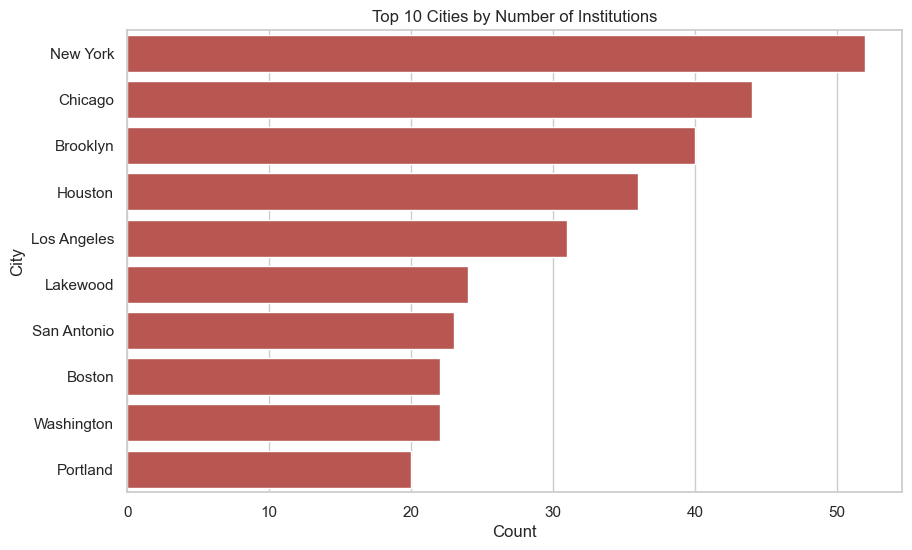

In [35]:
# Count the top 10 cities
top_cities = train_data['city'].value_counts().nlargest(10).index

plt.figure(figsize=(10,6))
sns.countplot(y='city', data=train_data[train_data['city'].isin(top_cities)], 
              order=top_cities)
plt.title('Top 10 Cities by Number of Institutions')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

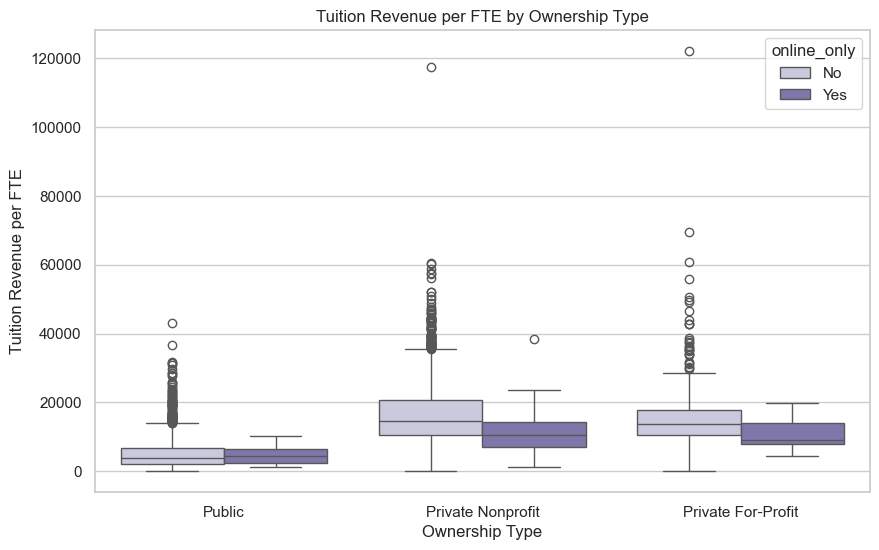

In [36]:
#Boxplots by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='ownership_code', y='tuition_revenue_per_fte',hue="online_only" , data=train_data, palette='Purples')
plt.title("Tuition Revenue per FTE by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Tuition Revenue per FTE")
plt.show()


C:\Users\OP\AppData\Local\Temp\ipykernel_1832\2271179784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='main_campus', y='faculty_salary', data=train_data, palette='Purples')


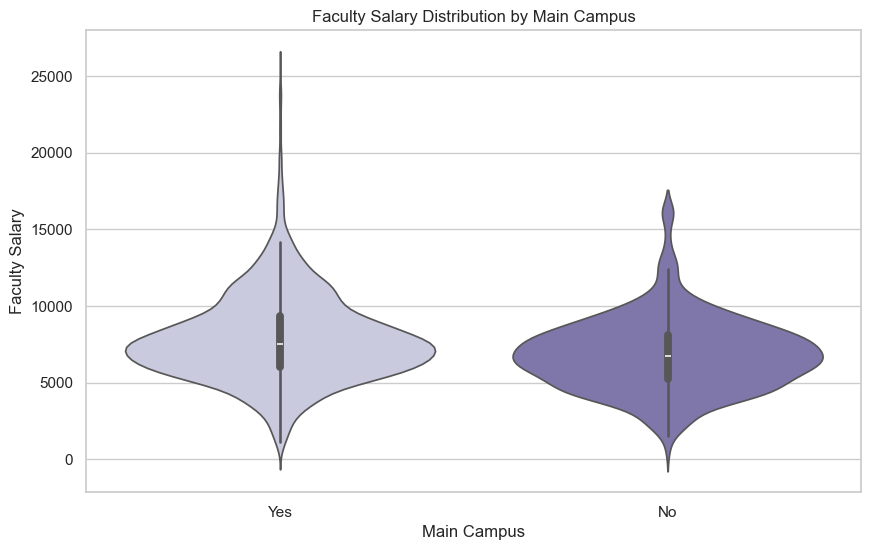

In [37]:
plt.figure(figsize=(10,6))
sns.violinplot(x='main_campus', y='faculty_salary', data=train_data, palette='Purples')
plt.title("Faculty Salary Distribution by Main Campus")
plt.xlabel("Main Campus")
plt.ylabel("Faculty Salary")
plt.show()


C:\Users\OP\AppData\Local\Temp\ipykernel_1832\3151834834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tuition.values, y=avg_tuition.index, palette='Reds')


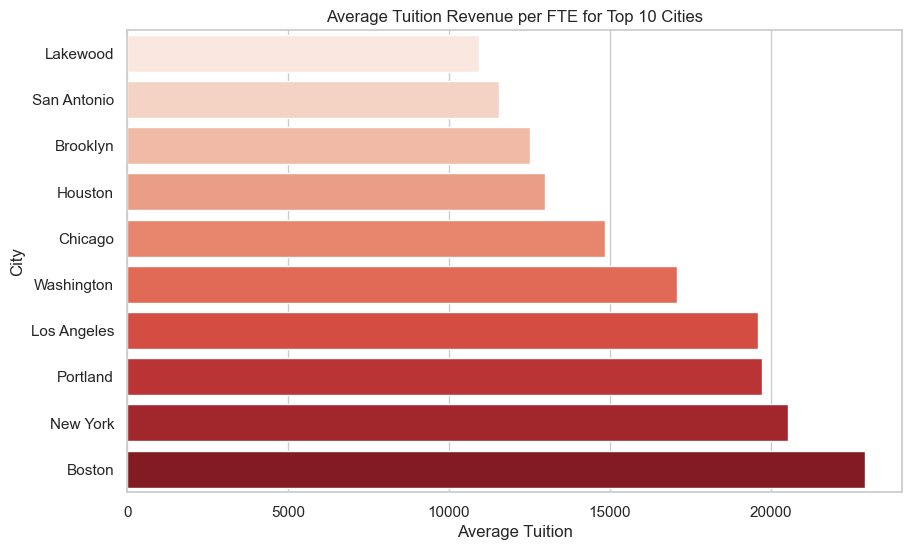

In [38]:
top_cities = train_data['city'].value_counts().nlargest(10).index
avg_tuition = train_data[train_data['city'].isin(top_cities)].groupby('city')['tuition_revenue_per_fte'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_tuition.values, y=avg_tuition.index, palette='Reds')
plt.title("Average Tuition Revenue per FTE for Top 10 Cities")
plt.xlabel("Average Tuition")
plt.ylabel("City")
plt.show()


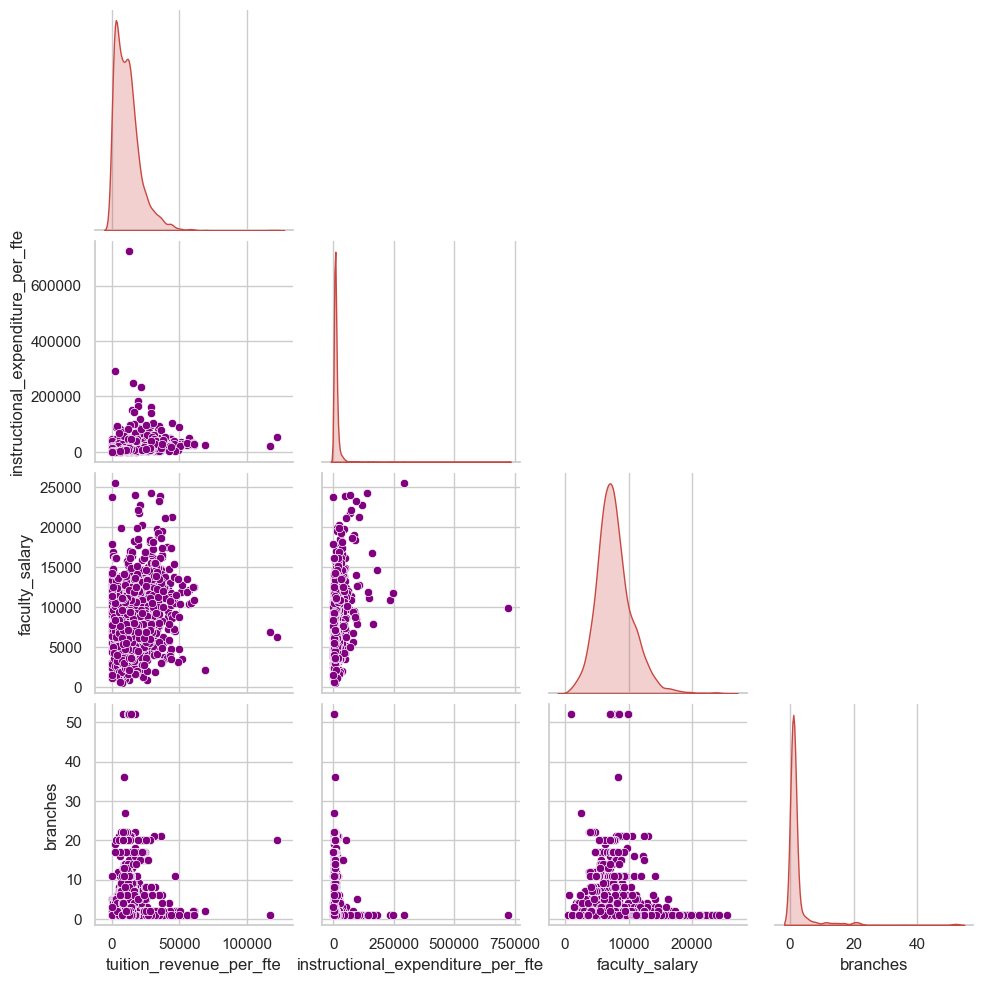

In [39]:
sns.pairplot(train_data[num_cols], kind='scatter', diag_kind='kde', corner=True, plot_kws={'color':'purple'})
plt.show()


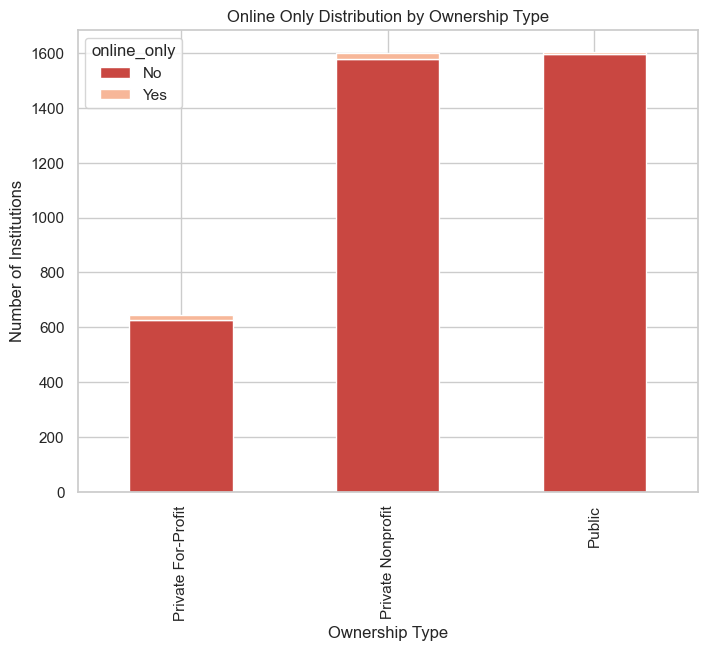

In [40]:
pd.crosstab(train_data['ownership_code'], train_data['online_only']).plot(
    kind='bar', stacked=True, figsize=(8,6), color=colors
)
plt.title("Online Only Distribution by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Number of Institutions")
plt.show()


##  Correlation Analysis

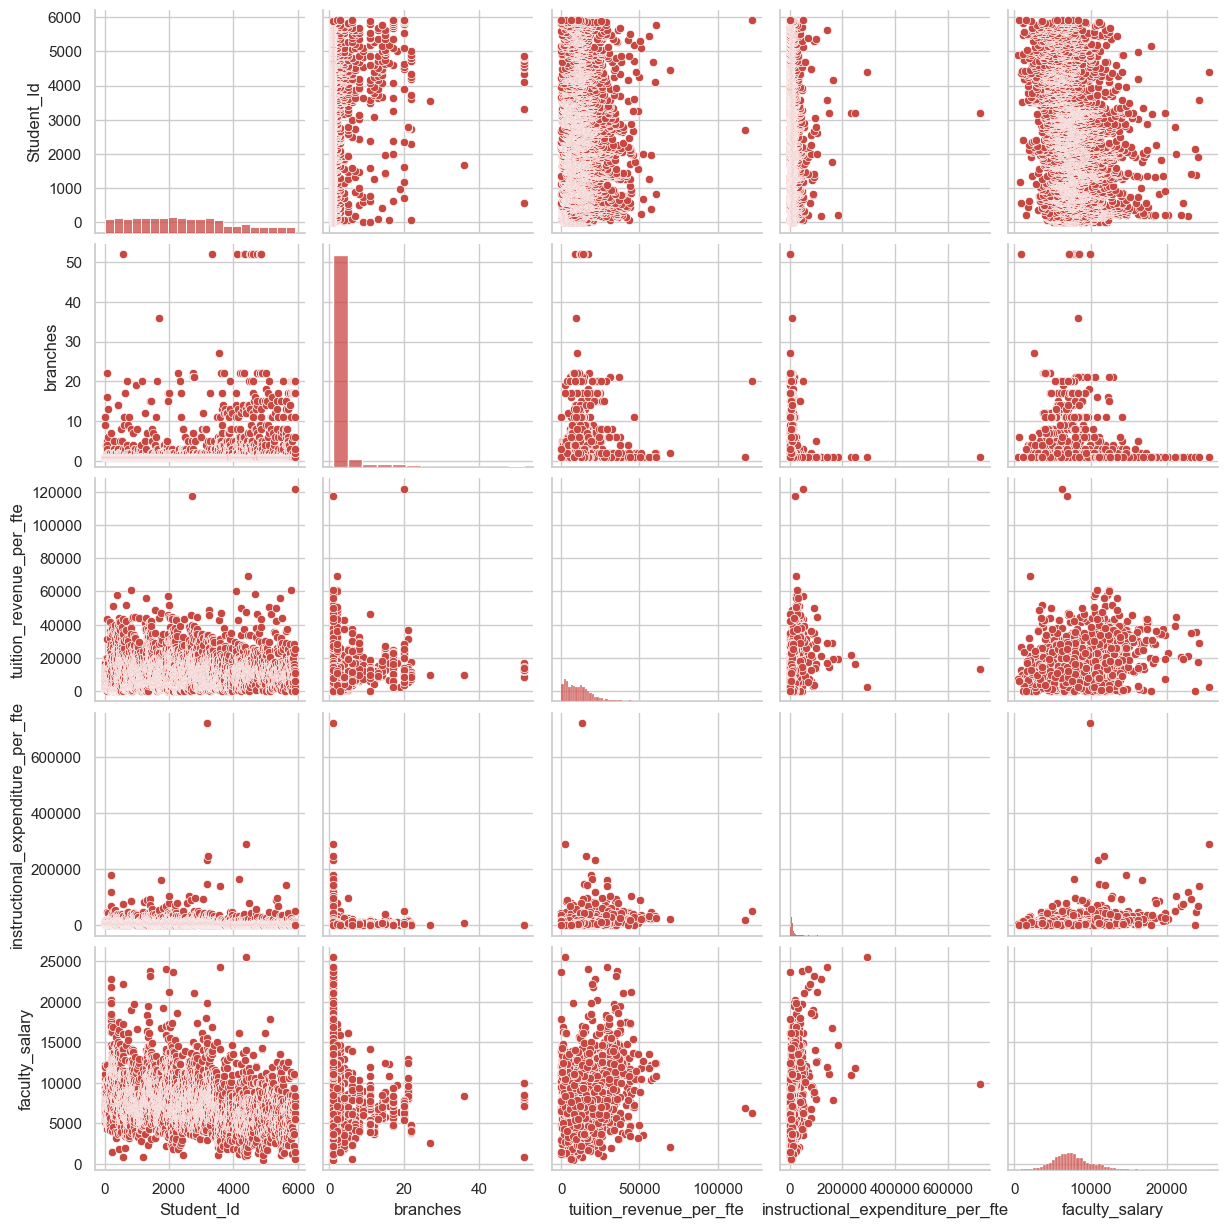

In [41]:
sns.pairplot(train_data)

---
# **Preparing the Data for Modeling**
---

**Numerical Features**  
   - Use **correlation** with the target `faculty_salary`.  
   - Keep only features with absolute correlation > 0.2. 

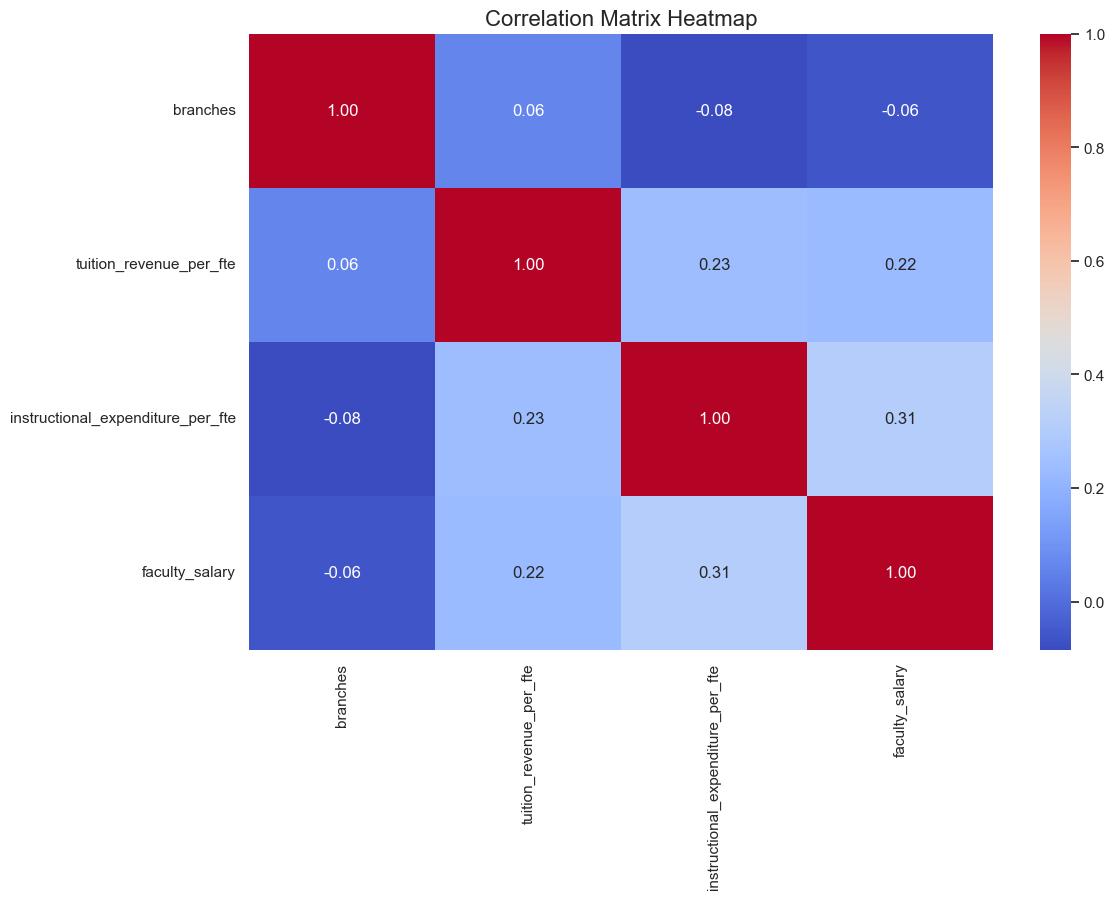


Correlation with Target (faculty_salary):
faculty_salary                       1.000000
instructional_expenditure_per_fte    0.310152
tuition_revenue_per_fte              0.224826
branches                            -0.060124
Name: faculty_salary, dtype: float64


In [42]:
plt.figure(figsize=(12, 8))
corr = train_data.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()
corr_matrix = train_data[num_cols].corr()

target_corr = corr_matrix["faculty_salary"].sort_values(ascending=False)
print("\nCorrelation with Target (faculty_salary):")
print(target_corr)


In [43]:
# --- Numerical Features (Condition on correlation > 0.2) ---
target_corr = corr_matrix["faculty_salary"].drop("faculty_salary")
num_features = target_corr[target_corr.abs() > 0.2].index.tolist()
num_features

['tuition_revenue_per_fte', 'instructional_expenditure_per_fte']

### Correlation for Categorical Features

### Why ANOVA?
I use ANOVA to check if categorical features have a significant effect on my continuous target variable.  
 - Keep only features with **p-value < 0.05**.  


In [44]:
# Encode categorical features using LabelEncoder
label_encoders = {}
encoded_data = train_data.copy()
for col in cat_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))
    label_encoders[col] = le

X_cat = encoded_data[cat_cols]
y = train_data["faculty_salary"]


In [45]:
# Run ANOVA F-test
f_values, p_values = f_regression(X_cat, y)

anova_results = pd.DataFrame({
    "Feature": cat_cols,
    "F-Value": f_values,
    "P-Value": p_values
}).sort_values(by="F-Value", ascending=False)

print("\nANOVA F-test Results (Categorical Features):")
print(anova_results)


ANOVA F-test Results (Categorical Features):
                 Feature     F-Value       P-Value
1         ownership_code  429.015796  1.937474e-90
2            main_campus   53.039638  3.944930e-13
3               branches   50.731679  1.258133e-12
6                  state   35.419757  2.895250e-09
8  religious_affiliation   27.171817  1.959391e-07
4            online_only   15.129698  1.020684e-04
0               dol_flag    6.554279  1.050110e-02
5                   city    1.787251  1.813405e-01
7                address    0.710230  3.994200e-01


In [46]:
cat_features = anova_results[anova_results["P-Value"] < 0.05]["Feature"].tolist()


In [47]:
X = encoded_data[num_features + cat_features]
print("Final features used in the model:", X.columns.tolist())

Final features used in the model: ['tuition_revenue_per_fte', 'instructional_expenditure_per_fte', 'ownership_code', 'main_campus', 'branches', 'state', 'religious_affiliation', 'online_only', 'dol_flag']


In [48]:
scaler = StandardScaler()
x = scaler.fit_transform(X[['tuition_revenue_per_fte', 'instructional_expenditure_per_fte', 'ownership_code',  'main_campus', 'branches','online_only', 'dol_flag','state','religious_affiliation']])


- **Target Variable (y)**:  
  The target we want to predict is `faculty_salary`

In [49]:
y = train_data["faculty_salary"]

##  Splitting the data into training and testing sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Shape of the training Features", X_train.shape)
print("Shape of the testing Features", X_test.shape)
print("Shape of the training Labels", y_train.shape)
print("Shape of the testing Labels", y_test.shape)

Shape of the training Features (3078, 9)
Shape of the testing Features (770, 9)
Shape of the training Labels (3078,)
Shape of the testing Labels (770,)


---
# **Modeling**
---

## 1. Building the Model

In [51]:
model = LinearRegression()
 # Creates a linear regression object
model

LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
print("Intercept (a0):", model.intercept_) # Intercept of the model
print("Slope (a1)    : ", model.coef_ )# Coefficient of the independent variable

Intercept (a0): 7721.356159219193
Slope (a1)    :  [1286.21231417  491.14552177 1512.50890216 -114.42859844   21.67560274
  -52.61348777 -134.98204404 -282.95836937  229.39630087]


In [54]:
model.score(X_train, y_train) # R^2 score of the model on the training data

0.3342927446359071

### Linear Regression Result  
- R² = **0.334** → explains only 33.4% of variance.  
- Indicates the relation is **not fully linear**.  

### Next Step  
Use **Polynomial Features** to capture non-linear patterns  
(squared & interaction terms) and improve performance.  


## Creating polynomial features

In [55]:
poly =PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X_train)
print(X_poly)

[[ 1.00000000e+00 -7.46883707e-01 -8.43365156e-02 ...  1.70017336e-03
   1.28008808e-03  9.63799064e-04]
 [ 1.00000000e+00 -7.46883707e-01 -4.40472129e-01 ...  3.75081567e-03
   1.90132392e-03  9.63799064e-04]
 [ 1.00000000e+00 -2.57831230e-01 -2.03198149e-02 ...  2.42432711e-03
   1.52858242e-03  9.63799064e-04]
 ...
 [ 1.00000000e+00  1.22473740e-01 -2.29114499e-01 ... -3.45374661e+02
  -1.03342006e+03 -3.09216957e+03]
 [ 1.00000000e+00  5.56529864e-01 -4.85579982e-01 ...  7.26872138e-03
   2.64680692e-03  9.63799064e-04]
 [ 1.00000000e+00 -4.61525271e-01 -5.52501355e-01 ...  3.75081567e-03
   1.90132392e-03  9.63799064e-04]]


In [56]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', ..., 'x7^2 x8^7', 'x7 x8^8', 'x8^9'], dtype=object)

##  Building and training a polynomial regression model

In [57]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)

Intercept: 5662.145056215798
Coefficients: [494.2065003  468.59709052 327.73814279 ... 406.33845381 435.9998596
 240.57422952]


In [58]:
# Predict on the training data
X_poly = poly.transform(X_train)
poly_y_preds = poly_reg.predict(X_poly)
poly_y_preds


array([ 7652.7747901 ,  2746.74254199, 10726.34480503, ...,
        8606.04765705,  6017.43906199,  2494.97086546])

In [59]:
r2_train_poly = r2_score(y_train, poly_y_preds)
r2_train_poly

0.8434782324845849

### Polynomial Regression Results

- We applied **Polynomial Regression** with different degrees.  
- The performance improved as the degree increased until it reached its best at **degree = 9**.  
- At this degree, the model achieved an **R² score ≈ 0.843**, which is significantly better than the linear model.  
- However, after degree 9, the performance started to decrease   
- Therefore, we choose **Polynomial Regression with degree = 9** as the training best model.  


## Evaluating the Linear Model

In [60]:
linear_y_preds = model.predict(X_test)
linear_y_preds

array([11483.36093074,  5591.15992011,  7803.11822561,  6013.62741159,
        6938.15911489,  7590.34740413,  8344.40928656,  6971.87061502,
        6525.75609071,  7596.26980712,  3972.51035016,  8063.30768955,
        8174.13591437,  8446.81646559,  5424.29265156,  6351.15269926,
        7599.4174611 ,  7347.37176298, 10205.83852631,  9222.39138749,
        8129.99562591,  7596.43393085, 12719.31269536,  6610.9201328 ,
        5992.12043283,  4208.70506597,  5546.79448787,  6717.04036515,
        8275.36392112,  7837.34234073,  7980.54266536,  8002.67956926,
        8630.08413042,  7897.64581651,  8234.87100503,  5339.11994536,
        7286.69867358,  7694.74440617,  9204.83675082,  7843.70293379,
       10920.67997786,  8503.57394184, 10016.76790663,  7857.37139727,
        7697.88224189,  9922.0863961 ,  6180.50545542,  8150.35687737,
        4151.67321447,  7502.10646228,  7674.07751013,  6798.19569312,
        8661.17527411,  7995.85775801,  4999.94479928,  8216.11666329,
      

In [61]:
score = r2_score(y_test, linear_y_preds)
score

0.30486949101495164

## Evaluating the Polynomial Model

In [62]:
X_test_poly = poly.transform(X_test)
y_test_pred = poly_reg.predict(X_test_poly)
r2_test = r2_score(y_test, y_test_pred)
r2_test 

-65779774218035.83

In [63]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Ridge Regression with Cross-Validation
# alphas: list of regularization strengths to test
alphas = [0.01,0.1,1,0.5, 10, 50, 100, 200] 

ridge_cv = RidgeCV(alphas=alphas, scoring='r2', store_cv_values=True)
ridge_cv.fit(X_train_poly, y_train)

print("Best alpha:", ridge_cv.alpha_)

# 4. Predict
y_train_pred = ridge_cv.predict(X_train_poly)
y_test_pred = ridge_cv.predict(X_test_poly)

# 5. Evaluate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R² on training set:", r2_train)
print("R² on test set:", r2_test)

# 6. Evaluate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

Best alpha: 200.0
R² on training set: 0.4329384750036951
R² on test set: 0.405564735105842
RMSE on training set: 2113.7304060340252
RMSE on test set: 2301.5898964010726


C:\Users\OP\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


# Polynomial Regression Summary

## 1. Degree 1 (Linear / Ridge α=200)
- **R²_train:** 0.33  
- **R²_test:** 0.31  
- **RMSE_train:** 2295  
- **RMSE_test:** 2480  
- **Observation:** Stable but underfitting — the model is too simple to capture non-linear patterns.

## 2. Degree 2 (Ridge α=200)
- **R²_train:** 0.43  
- **R²_test:** 0.41  
- **RMSE_train:** 2124  
- **RMSE_test:** 2321  
- **Observation:** More flexible than linear, stable predictions, minimal overfitting.

## 3. Degree 3 (Ridge α=200)
- **R²_train:** 0.48  
- **R²_test:** -1.95  
- **RMSE_train:** 2113  
- **RMSE_test:** 2301  
- **Observation:** Training fit improved but test performance collapsed → overfitting / numerical instability.

## 4. Degree 5 and 9
- Training R² very high (>0.55–0.93)  
- Test R² extremely negative (-400, -1e21)  
- RMSE_test exploded  
- **Observation:** Polynomial terms became too large, causing numerical instability.

## 5. Outlier Handling
- Removing or clipping outliers did not significantly improve results  
- Degree ≥3 polynomials are extremely sensitive to feature magnitude, not just outliers

---

## Conclusion
- **Degree 1–2:** stable, but underfitting → low R² (~0.40)  
- **Degree ≥3:** unstable, overfit → test R² negative, RMSE huge  
- High-degree polynomials are **not suitable** for this dataset due to numerical explosion and small dataset size (~3800 rows)

---

## Next Step
- Switch to **Random Forest** because it:
  - Handles non-linearities without numerical explosion  
  - Is robust to outliers and feature scaling  
  - Can achieve higher R² on test data with proper hyperparameter tuning


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
#  Random Forest model
rf = RandomForestRegressor(
    n_estimators=200,      
    max_depth=None,         
    random_state=42,
    n_jobs=-1               
)

# Train
rf.fit(X_train, y_train)

#  Predict
y_train_pred0 = rf.predict(X_train)
y_test_pred0 = rf.predict(X_test)

#  Evaluate
r2_train0 = r2_score(y_train, y_train_pred0)
r2_test0 = r2_score(y_test, y_test_pred0)

rmse_train0= np.sqrt(mean_squared_error(y_train, y_train_pred0))
rmse_test0 = np.sqrt(mean_squared_error(y_test, y_test_pred0))

print("R² on training set:", r2_train0)
print("R² on test set:", r2_test0)
print("RMSE on training set:", rmse_train0)
print("RMSE on test set:", rmse_test0)

R² on training set: 0.9349382706519844
R² on test set: 0.525612339071028
RMSE on training set: 715.9740887379562
RMSE on test set: 2056.091092042395


In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
# fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict using best estimator
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Evaluate
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R² on training set:", r2_train)
print("R² on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
R² on training set: 0.8445051445289928
R² on test set: 0.5609969145113887
RMSE on training set: 1106.8595500614865
RMSE on test set: 1977.9232963852508


In [67]:
param_dist = {
    'n_estimators': [300, 400, 500],
    'max_depth': [12, 15, 18, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 0.7, 0.8]
}

# Randomized search with 5-fold CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,   # number of random combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the search to training data
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate
best_rf0 = random_search.best_estimator_
y_train_pred0 = best_rf.predict(X_train)
y_test_pred0 = best_rf.predict(X_test)

r2_train0 = r2_score(y_train, y_train_pred0)
r2_tes0t = r2_score(y_test, y_test_pred0)
rmse_train0 = np.sqrt(mean_squared_error(y_train, y_train_pred0))
rmse_test0 = np.sqrt(mean_squared_error(y_test, y_test_pred0))

print("R² on training set:", r2_train0)
print("R² on test set:", r2_test0)
print("RMSE on training set:", rmse_train0)
print("RMSE on test set:", rmse_test0)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 18}
R² on training set: 0.8445051445289928
R² on test set: 0.525612339071028
RMSE on training set: 1106.8595500614865
RMSE on test set: 1977.9232963852508


In [68]:
#  Define Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

#  Hyperparameter ranges
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

#  Randomized search with 5-fold CV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,       # try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#  Fit the search
random_search.fit(X_train, y_train)

#  Best model and parameters
best_gbr = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

#  Predict
y_train_pred1 = best_gbr.predict(X_train)
y_test_pred1 = best_gbr.predict(X_test)

#  Evaluate
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))

print("R² on training set:", r2_train1)
print("R² on test set:", r2_test1)
print("RMSE on training set:", rmse_train1)
print("RMSE on test set:", rmse_test1)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05}
R² on training set: 0.8537635841052912
R² on test set: 0.5598961806583236
RMSE on training set: 1073.4016813837773
RMSE on test set: 1980.40141576747


In [69]:
from sklearn.ensemble import StackingRegressor

# Base models
rf2 = RandomForestRegressor(n_estimators=500, max_depth=18,
                           min_samples_split=5, min_samples_leaf=1,
                           max_features='sqrt', random_state=42)

gbr2 = GradientBoostingRegressor(n_estimators=500, max_depth=10,
                                learning_rate=0.05, min_samples_split=5,
                                min_samples_leaf=1, random_state=42)

# Stacking ensemble
stack = StackingRegressor(
    estimators=[('rf', rf2), ('gbr', gbr2)],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

# Fit ensemble
stack.fit(X_train ,y_train.values.ravel())

# Predictions
y_train_pred2 = stack.predict(X_train)
y_test_pred2 = stack.predict(X_test)

# Evaluate
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))

print("Stacking R² on training set:", r2_train2)
print("Stacking R² on test set:", r2_test2)
print("Stacking RMSE on training set:", rmse_train2)
print("Stacking RMSE on test set:", rmse_test2)


Stacking R² on training set: 0.8954681870497593
Stacking R² on test set: 0.556282962909332
Stacking RMSE on training set: 907.5253088118411
Stacking RMSE on test set: 1988.5142682811654


# Model Evaluation Summary

## Best Model: Gridsearch Random Forest
Performance:

R² (training set): 0.84

R² (test set): 0.56

RMSE (training set): 1106

RMSE (test set): 1977

Comparison with Gradient Boosting

Gradient Boosting Performance:

R² (training set): 0.85

R² (test set): 0.546

RMSE (training set): 1073

RMSE (test set): 1980

Random Forest slightly outperformed Gradient Boosting on the test set.

Stacking Ensemble Attempt

Combined Random Forest + Gradient Boosting using Linear Regression as meta-learner.

Performance:

R² (training set): 0.896

R² (test set): 0.55

RMSE (training set): 907

RMSE (test set): 1988

Stacking did not improve test performance; slight overfitting was observed.

C:\Users\OP\AppData\Local\Temp\ipykernel_1832\839679630.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


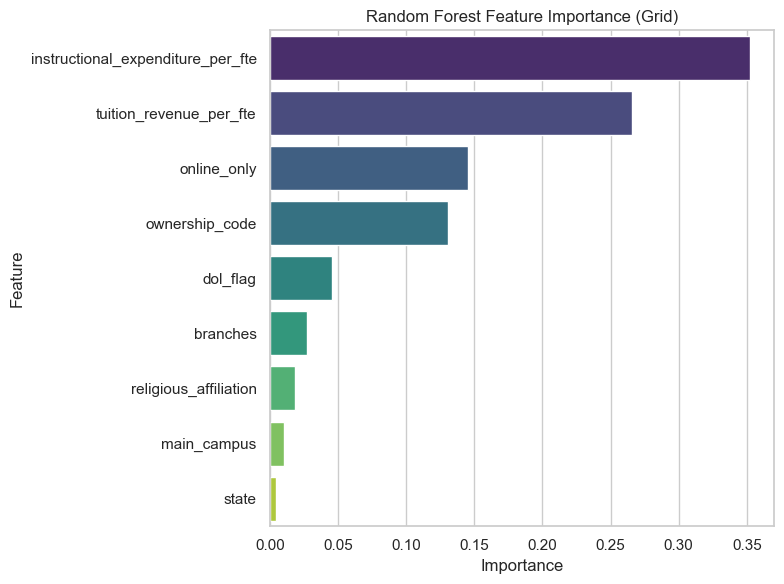

In [70]:
#  Feature Importance Plot
importances = best_rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance (Grid)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


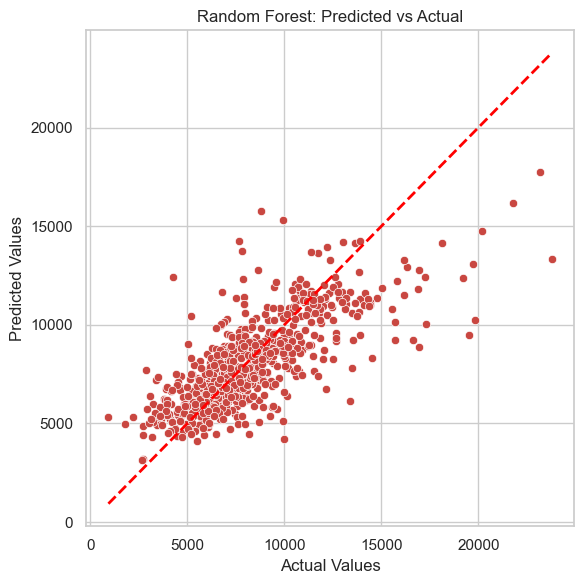

In [71]:
y_pred = best_rf.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Predicted vs Actual')
plt.tight_layout()
plt.show()

## preparing `holdout_data` to predict `faculty_salary`

In [72]:
label_encoders1 = {}
encoded_data1 = holdout_data.copy()
for col in cat_cols:
    le = LabelEncoder()
    encoded_data1[col] = le.fit_transform(encoded_data1[col].astype(str))
    label_encoders[col] = le



In [73]:
holdout_data_pred = encoded_data1[num_features + cat_features]
print("Final features used in the model:", holdout_data_pred.columns.tolist())

Final features used in the model: ['tuition_revenue_per_fte', 'instructional_expenditure_per_fte', 'ownership_code', 'main_campus', 'branches', 'state', 'religious_affiliation', 'online_only', 'dol_flag']


In [74]:
scaler = StandardScaler()
holdout_data_pred = scaler.fit_transform(holdout_data_pred[['tuition_revenue_per_fte', 'instructional_expenditure_per_fte', 'ownership_code',  'main_campus', 'branches','online_only', 'dol_flag','state','religious_affiliation']])


In [75]:
#  Predict faculty_salary
faculty_salary= best_rf.predict(holdout_data_pred)


In [76]:
#Add predictions to holdout_data
holdout_data['faculty_salary'] = faculty_salary

In [77]:
holdout_data.head()

,Student_Id,zip_code,city,institution_name,state,address,dol_flag,branches,ownership_code,main_campus,religious_affiliation,tuition_revenue_per_fte,instructional_expenditure_per_fte,ownership_type,faculty_salary,online_only
17,17,35951,Albertville,New Beginning College of Cosmetology,AL,421 Martling Road,No,1,Private For-Profit,Yes,No affiliation,9499.0,2921.0,Proprietary,5884.629195,No
25,25,36022,Deatsville,J F Ingram State Technical College,AL,5375 Ingram Rd,No,1,Public,Yes,No affiliation,2.0,9192.0,Public,9155.975875,No
43,43,36701,Selma,Selma University,AL,"1501 Boynton St, Dinkins Hall",No,1,Private Nonprofit,Yes,54.0,2186.0,8074.0,Private Nonprofit,8111.661976,No
56,56,99645,Palmer,Alaska Bible College,AK,248 E Elmwood Ave,No,1,Private Nonprofit,Yes,88.0,12387.0,8702.0,Private Nonprofit,9461.023194,No
60,60,99664-0889,Seward,Alaska Vocational Technical Center,AK,PO Box 889,Yes,1,Public,Yes,No affiliation,9895.0,31891.0,Public,9783.705755,No


In [78]:
holdout_data.isna().sum()

Student_Id                           0
zip_code                             0
city                                 0
institution_name                     0
state                                0
address                              0
dol_flag                             0
branches                             0
ownership_code                       0
main_campus                          0
religious_affiliation                0
tuition_revenue_per_fte              0
instructional_expenditure_per_fte    0
ownership_type                       0
faculty_salary                       0
online_only                          0
dtype: int64

### intgrate train_data, holdout_data together

In [79]:
data = pd.concat([train_data, holdout_data], ignore_index=True)

In [80]:
data.shape

(6405, 16)

In [81]:
data.isna().sum()

Student_Id                           0
zip_code                             0
city                                 0
institution_name                     0
state                                0
address                              0
dol_flag                             0
branches                             0
ownership_code                       0
main_campus                          0
religious_affiliation                0
tuition_revenue_per_fte              0
instructional_expenditure_per_fte    0
ownership_type                       0
faculty_salary                       0
online_only                          0
dtype: int64

In [83]:
data.to_csv('full_data1.csv', index=False)
